# Bessel Functions

**Bessel's Differential Equation:**
$$ x^2y'' + xy' + (x^2-n^2)y = 0 $$

**Solution (Bessel Functions):**
$$ j_n(x) = \sum_{m=0}^{\infty} \frac{(-1)^m}{m! \Gamma(m+n+1)} \left(\frac{x}{2}\right)^{(2m+n)} $$ 

$$ j_{-n}(x) = (-1)^n j_n(x) $$

### from `scipy.special`

In [1]:
from scipy.special import *
jn(3,2)

0.12894324947440208

## By calculations

In [2]:
import numpy as np
from scipy.special import factorial

def besselfn(n,x):
    return sum([(-1)**m*(x/2)**(2*m+n)/(factorial(m)*factorial(m+n))
                for m in range(95)])
besselfn(3,2)

0.1289432494744021

We can get, $$ j_n(x) = \sum_{m=0}^{\infty} t_m $$

Where, $ \hspace{2mm} t_m = - \frac{1}{m(m+n)} (\frac{x}{2})^2 t_{m-1} \hspace{4mm} $ and $ \hspace{4mm} t_0 = \frac{(x/2)^n}{n!} $.

In [3]:
def fact(n):
    fct = 1
    for i in range(2,n+1):
        fct *= i
    return fct

In [4]:
def besfn(nn,x):
    n = abs(nn)
    tol = 1e-5
    t = (x/2)**n/fact(n)  # t_0
    sm = t
    m = 1
    while True:
        sm1 = sm
        t = -(x/2)**2*t/(m*(m+n))
        sm += t
        m += 1
        if abs(sm - sm1) < tol:
            break
    if nn < 0:    # j_-n(x)
        sm = (-1)**n*sm
    return sm

In [5]:
besfn(3,2)

0.1289434523809524

### By recurrence formula

$$ j_{n+1}(x) = \frac{2x}{n} j_n(x) - j_{n-1}(x)  $$
For given $j_0(x)$ and $j_1(x)$.

In [6]:
from scipy.special import *

def recjn(n,x):
    if n == 0:
        return jn(0,x)
    elif n == 1:
        return jn(1,x)
    elif n >= 2:
        jn0, jnmin1 = jn(1,x), jn(0,x)
        for i in range(2,n+1):
            jn1 = 2*(i-1)/x*jn0 - jnmin1
            jnmin1 = jn0
            jn0 = jn1
        return jn1

In [7]:
recjn(3,2)

0.1289432494744024

**Verification**

In [8]:
n1, x1 = 5,-2  # input values
print('by using function in scipy.special\n\t',jn(n1,x1))
print('by calculations\n\t',besfn(n1,x1))
print('by recurrence formula\n\t',recjn(n1,x1))

by using function in scipy.special
	 -0.007039629755871686
by calculations
	 -0.007039517195767195
by recurrence formula
	 -0.007039629755874244


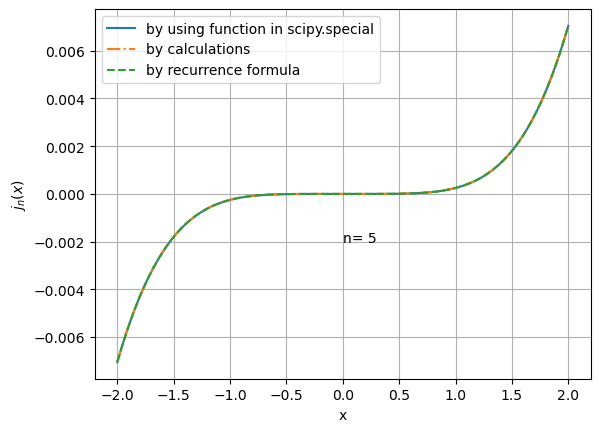

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2,2,100)
n = 5  # input the value
jn1 = jn(n,x)
besfn1 = [besfn(n,x[i]) for i in range(len(x))]
recjn1 = [recjn(n,x[i]) for i in range(len(x))]

plt.plot(x,jn1,'-',label='by using function in scipy.special')
plt.plot(x,besfn1,'-.',label='by calculations')
plt.plot(x,recjn1,'--',label='by recurrence formula')
plt.text((max(x)-abs(min(x)))/2,(max(jn1)-abs(min(jn1)))/3-2e-3,f'n= {n}')
plt.legend()
plt.xlabel('x')
plt.ylabel('$j_n(x)$')
plt.grid()
plt.show()